We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [1]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
%matplotlib inline


Let’s display the first five rows of data

In [2]:
data = pd.read_csv(r'C:\Users\Lenovo\Documents\Ironhack\DATA\airlines_passengers.csv') 
data.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [3]:
data.tail(5)

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [4]:
data["Month"]= pd.to_datetime(data["Month"])
data

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


The next thing we can do is convert the month column to an index. 


In [5]:
data.set_index('Month', inplace=True)
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

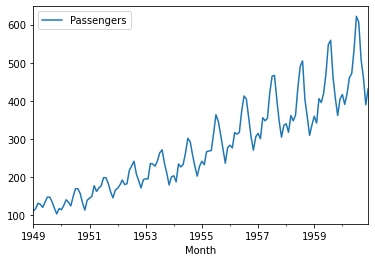

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data.plot()
plt.show()

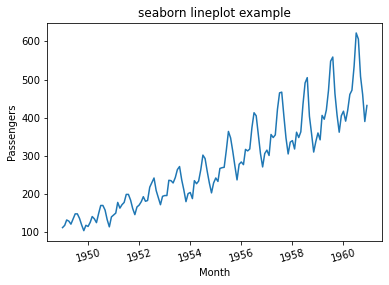

In [7]:
import seaborn as sns
sns.lineplot(x="Month", y="Passengers", data=data)
plt.xticks(rotation=15)
plt.title('seaborn lineplot example')
plt.show()

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [8]:
from statsmodels.tsa.stattools import adfuller


Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [9]:
result = adfuller(data['Passengers'], autolag='AIC')
result

(0.8153688792060456,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [10]:
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: 0.82
5% Critical Value: -2.88
p-value: 0.99


Store our results in a dataframe display it

Explain the results

In [11]:
pvalue is higher than 0.05 so we accept H0 cad it is not stationary

SyntaxError: invalid syntax (Temp/ipykernel_4552/2161548462.py, line 1)

In [ ]:
X = data['Passengers']
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:] # on divise les periodes, mean et mariave differents: donc non stationarity
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
# Calculate the ACF (via statsmodel)
plot_acf(data)
# Show the data as a plot (via matplotlib)
plt.show()

Calculate partial autocorrelation

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_pacf(data, alpha =0.05, lags=50)
plt.show()


Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Dataon 
result_add = seasonal_decompose(data['Passengers'], model='additive') #just the colums and the model mutiplicative


# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('additive Decompose', fontsize=22)

plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Dataon 
result_mul = seasonal_decompose(data['Passengers'], model='multiplicative') #just the colums and the model mutiplicative


# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('multiplicative Decompose', fontsize=22)

plt.show()

In [ ]:
multiactive is the best model, because residual are all around 1


Can you describe the charts?


Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

In [ ]:
#because it is not stationnary, we make stationary
# Change for (t)th day is Close for (t)th day minus Close for (t-1)th day. # je mets mes données statitionary
data['Difference'] = data['Passengers'].diff()

# Plot the Change
plt.figure(figsize=(10, 7))
plt.plot(data['Passengers'])
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

In [ ]:
data

In [ ]:
#check if now is stationary:
result = adfuller(data.Difference.dropna()) #ne pas oublié de supprimer les data nul
print(result)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

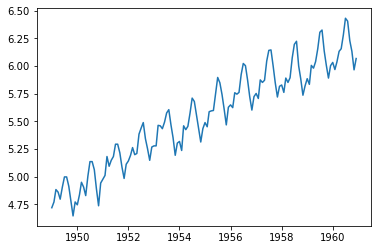

In [14]:
#other method to make stationnay
import matplotlib.pyplot as plt
data['passengerlog'] = np.log(data['Passengers'])
plt.plot(data['passengerlog'])

In [15]:
#other method to test if stationnary

In [18]:
# Import kpss
from statsmodels.tsa.stattools import kpss
result = kpss(data['passengerlog'])
print(result)
print('KPSS Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[3]['5%'])
print('p-value: %.2f' % result[1])

(1.053981419846458, 0.01, 14, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Test Statistic: 1.05
5% Critical Value: 0.46
p-value: 0.01


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
now p-value is less than 0.05 so it is stationnary

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


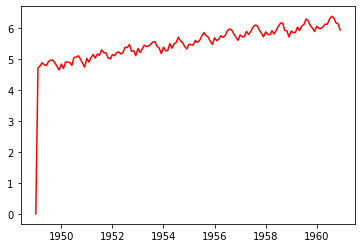

In [25]:
#un modèle ARIMA avec un AR d’ordre 2, une différence d’ordre 1 et un MA d’ordre 2
 
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
decomposition = seasonal_decompose(data['passengerlog'])#

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['passengerlog'], order=(2,1,2))
results = model.fit()
plt.plot(results.fittedvalues, color='red')

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_4552/1965414097.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:           passengerlog   No. Observations:                  144
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 130.043
Date:                Tue, 18 Jan 2022   AIC                           -248.087
Time:                        22:09:29   BIC                           -230.310
Sample:                    01-01-1949   HQIC                          -240.863
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2126      0.103      2.063      0.039       0.011       0.414
ar.L2         -0.1931      0.104     -1.853      0.064      -0.397       0.011
ar.L3         -0.0125      0.082     -0.152      0.8

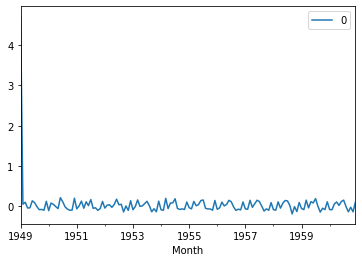

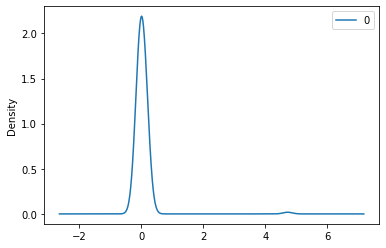

                0
count  144.000000
mean     0.045692
std      0.403817
min     -0.188866
25%     -0.066395
50%     -0.001803
75%      0.107896
max      4.718499


In [27]:
#we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, 
#uses a difference order of 1 to make the time series stationary,
#and uses a moving average model of 0.
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

model = ARIMA(data['passengerlog'], order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

MA(1)

Display the output

MA(2)

Display the output

AR(2)

In [ ]:
# Try a AR(4) model
from statsmodels.regression.linear_model import yule_walker
rho, sigma = yule_walker(data['data'], 4) #4 is the lag you choose 4 : 4 previous y; sigma is intercept(noise?)
print(f'rho: {-rho}') #coeficient for our equation
print(f'sigma: {sigma}')

ARMA (?,?)

Display the output

ARIMA(?,?)

Display the output

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

Calculate AIC